In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_transform.csv"


In [3]:
df <- read.csv(file = file)
data <- df
head(data)

est,t_loc,sex,eda,nac_dia,nac_mes,nac_anio,l_nac_c,cs_p12,cs_p13_1,⋯,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins
0.008311845,0.9311753,0.4852808,0.4693878,1.0000000,0.2307813,0.8015105,0.9036219,0.9669228,0.3206278,⋯,0.996047,1,0.5758210,0.9870152,0.7714570,0.6762177,0.9997382,0.6762177,0.9754833,0.9736246
0.008311845,0.9311753,1.0000000,0.4897959,0.9308219,0.6923701,0.7735644,0.9036219,0.9669228,0.3206278,⋯,0.996047,1,0.9643311,0.9870152,0.7714570,1.0000000,0.9997382,0.7010746,0.6578792,0.9984816
0.008311845,0.9311753,0.4852808,0.2346939,0.5938191,0.8466956,0.1609618,0.9036219,0.9669228,0.9821066,⋯,0.996047,1,0.7202901,0.9870152,1.0000000,1.0000000,0.9997382,0.9963611,0.8612249,0.6847651
0.008311845,0.9311753,1.0000000,0.1836735,0.3858659,0.3149338,0.2507036,0.9036219,0.9669228,0.7420579,⋯,0.996047,1,0.5410291,0.9870152,0.5410291,0.5410291,0.9997382,0.5410291,0.5410291,0.5410291
0.008311845,0.9311753,0.4852808,0.3673469,1.0000000,1.0000000,0.9437020,0.7979371,0.9669228,0.7420579,⋯,0.996047,1,0.5410291,0.9870152,0.5410291,0.5410291,0.9997382,0.5410291,0.5410291,0.5410291
0.008311845,0.9311753,1.0000000,0.3163265,0.1875728,0.3149338,0.0143592,0.7979371,0.9669228,0.7420579,⋯,0.996047,1,0.8718405,0.9870152,1.0000000,1.0000000,0.9997382,0.9963611,0.8612249,0.8384361


In [4]:
ncol(data)

[1] 68

In [5]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [6]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
est,0.9930616
t_loc,0.3160565
sex,0.6927138
eda,4.3866805
nac_dia,3.4174432
nac_mes,2.4782084


In [7]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
7,nac_anio,4.393284
4,eda,4.386681
5,nac_dia,3.417443
6,nac_mes,2.478208
51,anios_esc,2.441580
52,hrsocup,2.157129


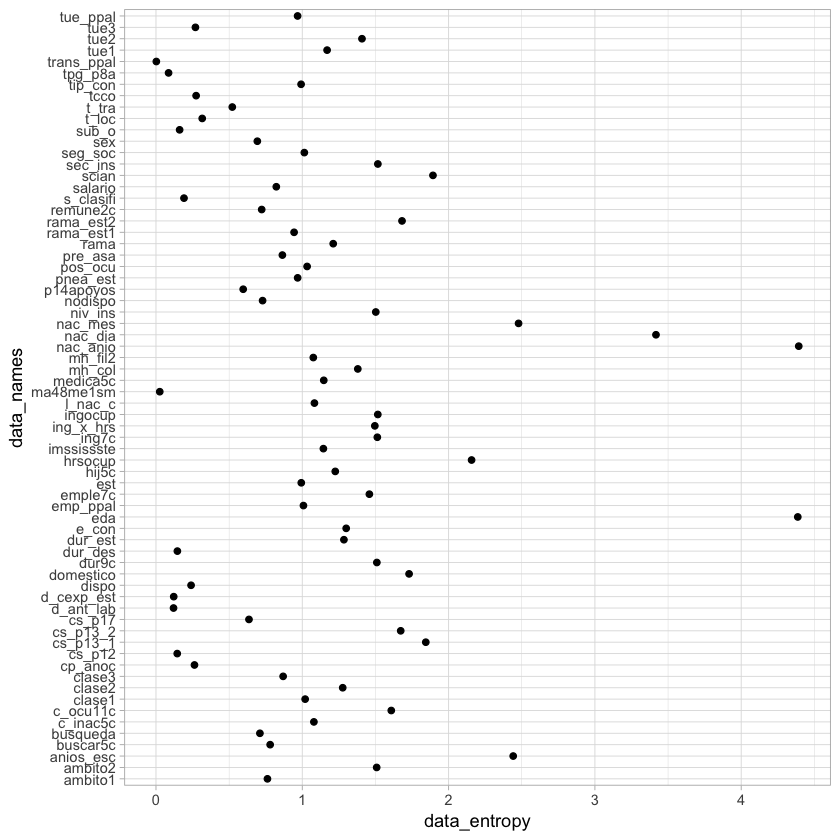

In [10]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

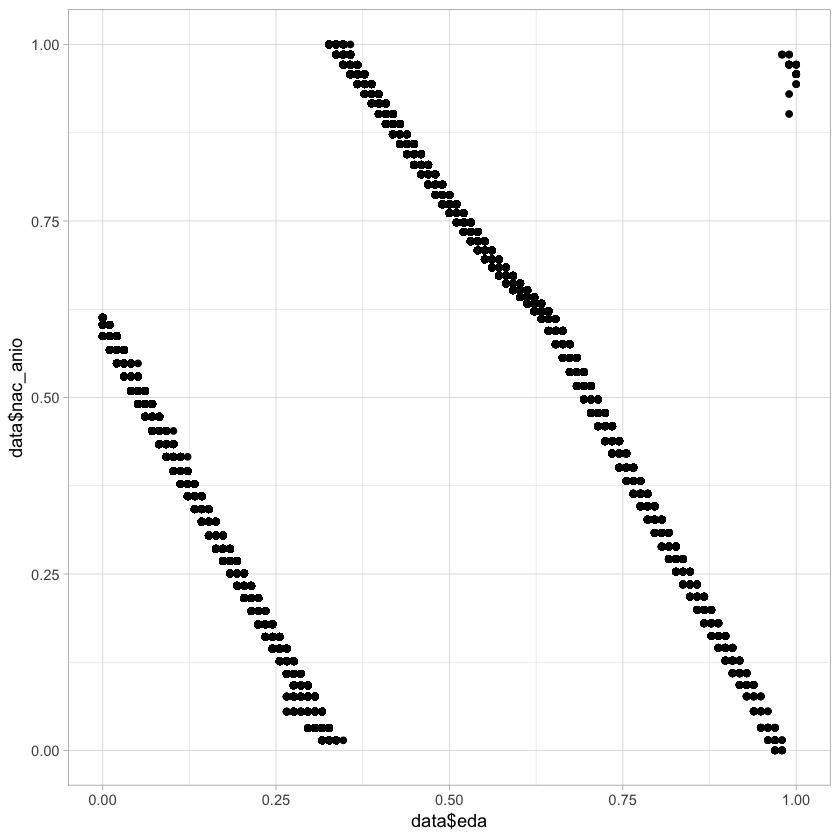

In [11]:
ggplot(data = data, 
       aes(y=data$nac_anio, 
           x=data$eda)) + geom_point() + theme_light()

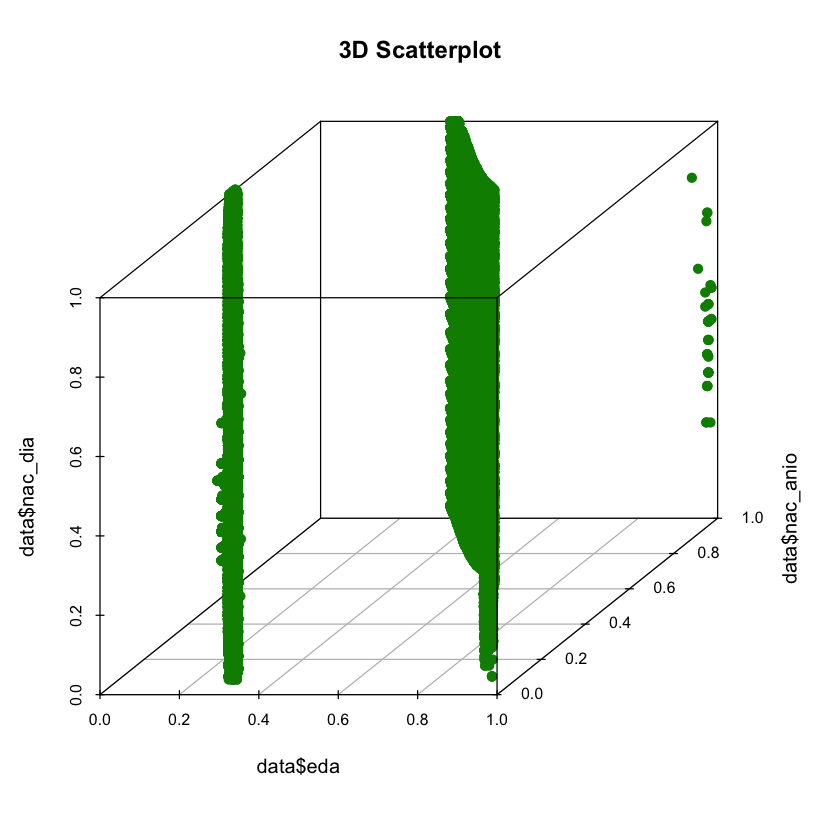

In [12]:
scatterplot3d(y=data$nac_anio, 
              x=data$eda,
              z=data$nac_dia, pch = 19, color = "green4", main="3D Scatterplot")





In [13]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_entropy_transform.csv"


In [14]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
